<font size = "5"> **[Image Tools](2_Image_Tools.ipynb)** </font>

<hr style="height:2px;border-top:4px solid #FF8200" />


#  Analyzing Spot Diffraction Pattern


[<img src=https://www.coeuscreativegroup.com/wp-content/uploads/2020/04/download-button.png, width=125>](https://raw.githubusercontent.com/pycroscopy/pyTEMlib/main/notebooks/Imaging/D2-Diffraction_Spots.ipynb) 

[![OpenInColab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/pycroscopy/pyTEMlib/blob/main/notebooks/Imaging/D2-Diffraction_Spots.ipynb)
    
    

part of 

<font size = "5"> **[pyTEMlib](https://pycroscopy.github.io/pyTEMlib/about.html)**</font>

a [pycroscopy](https://pycroscopy.github.io/pycroscopy/about.html) ecosystem package


Notebook by Gerd Duscher, 2025

Microscopy Facilities<br>
Institute of Advanced Materials & Manufacturing<br>
The University of Tennessee, Knoxville

Model based analysis and quantification of data acquired with transmission electron microscopes


## Content
An introduction into **diffraction_tools** and how to use the functions in this package to 
index spot diffraction pattern of **single crystal** sample areas.

The scope of this notebook includes calculation and plotting of 
- allowed, forbidden and dynamically activated Bragg reflections,
- Kikuchi- and HOLZ-lines.

The diffraction vectors are given in polar coordinates and internally in Å or 1/Å because that is the base unit of the ase (atomic simulation evironment) package. The package ase is the crystallography package used in pyTEMlib and allows easy conversion to MD and DFT calculations as well as abTEM image and diffraction simulations. Please note that we often plot in the for microscopy more convenient units of nm and 1/nm.


An explanation on the physcial background can be found in the *[Diffraction](https://gduscher.github.io/MSE672-Introduction-to-TEM/diffraction/ch2-00-diffraction/)* chapter of MSE672-Introduction to TEM


## Install pyTEMlib

If you have not done so in the [Introduction Notebook](../0_pyTEMlib.ipynb), please test and install [pyTEMlib](https://github.com/gduscher/pyTEMlib) and other important packages with the code cell below.



## Load relevant python packages
### Check Installed Packages

In [1]:
import sys
import importlib.metadata
def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = importlib.metadata.version(package_name)
    except importlib.metadata.PackageNotFoundError:
        version = '-1'
    return version

if test_package('pyTEMlib') < '0.2024.1.0':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install git+https://github.com/pycroscopy/pyTEMlib.git@main -q --upgrade

if 'google.colab' in sys.modules:
    !{sys.executable} -m pip install numpy==1.24.4
print('done')

done


### Load the plotting and figure packages
Import the python packages that we will use:

Beside the basic numerical (numpy) and plotting (pylab of matplotlib) libraries,

we will use pyTEMlib - especially:
* diffraction_tools library.



In [1]:
# import matplotlib and numpy
#                       use "inline" instead of "notebook" for non-interactive plots
%matplotlib  widget
import matplotlib.pyplot as plt
import numpy as np
import sys
if 'google.colab' in sys.modules:
    from google.colab import output
    output.enable_custom_widget_manager()

# Import libraries from the pyTEMlib
%load_ext autoreload
%autoreload 2
sys.path.insert(0, '../../')
import pyTEMlib

__notebook_version__ = '2025.12.12'
print('pyTEM version: ', pyTEMlib.__version__)
print('notebook version: ', __notebook_version__)

pyTEM version:  0.2025.12.1
notebook version:  2025.12.12



## Define Crystal

Define a Crystal as an ase object.
 
That allows for easy access to things like reciprocal unit cells (*atoms.cell.reciprocal()*)

With the provided crystal tools it is straight forward to change to 'Gold', 'graphite', 'Pt', or any other supported crystals. Adding structruees with POSCAR or cif files is also supported.

## Plot Diffraction Pattern
For a minimum we need the zone_axis in Miller indices and the acceleration voltage fo the TEM.
We pack those information in a dictionary and run *get_bragg_reflections* from *diffraction_tools*

> Note:
>
> We calculate the Bragg reflections in polar coordinates.

In [173]:
#Initialize the dictionary with all the input
atoms = pyTEMlib.crystal_tools.structure_by_name('Silicon')
print(atoms)
import ase.visualize
ase.visualize.view(atoms*2, viewer='x3d')


Lattice(symbols='Si8', pbc=True, cell=[5.43088, 5.43088, 5.43088])


Of the 357910 tested reciprocal lattice points 2076 have an excitation error less than 0.30 1/nm
Of the 2076 possible reflection 404 are allowed.
Of those, there are 56 in ZOLZ  and 348 in HOLZ
Of the 98 forbidden reflection in ZOLZ  20 can be dynamically activated.


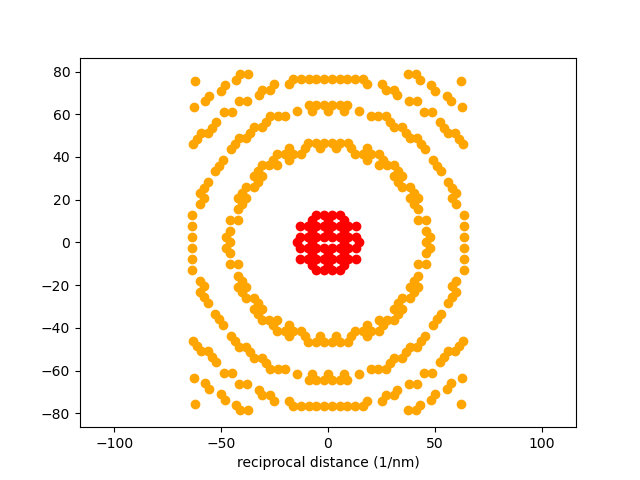

In [6]:
# --------------- INPUT ------------------------
zone_hkl = np.array([1, 1, 0])
hkl_max = 35  #  maximum allowed Miller index
sg_max = 0.03   # 1/Ang  maximum allowed excitation error

acceleration_voltage = 200.0 * 1000.0 #V

rotation = np.radians(0)  # rotation of diffraction pattern
# -------------------------------------------

tags = {'zone_hkl': zone_hkl,
        'hkl_max': hkl_max,
        'Sg_max': sg_max,
        'acceleration_voltage':  acceleration_voltage}
diff_dict ={}
diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags, verbose=True) 


# Simple Plot
ZOLZ = diff_dict['allowed']['ZOLZ']
HOLZ = diff_dict['allowed']['HOLZ']
r = diff_dict['allowed']['g'][:, 0]
phi = diff_dict['allowed']['g'][:, 1]

x = r *np.cos(phi+rotation)*10
y = r * np.sin(phi+rotation)*10


plt.figure()
plt.scatter(x[ZOLZ], y[ZOLZ], label='ZOLZ allowed', c='r')
plt.scatter(x[HOLZ], y[HOLZ], label="HOLZ allowed", c ='orange')
plt.axis('equal')
plt.xlabel('reciprocal distance (1/nm)');

### Allowed, Forbidden and Dynamically-Activated Reflections

We can now plot allowed forbidden and dynamically activated reflections independently.

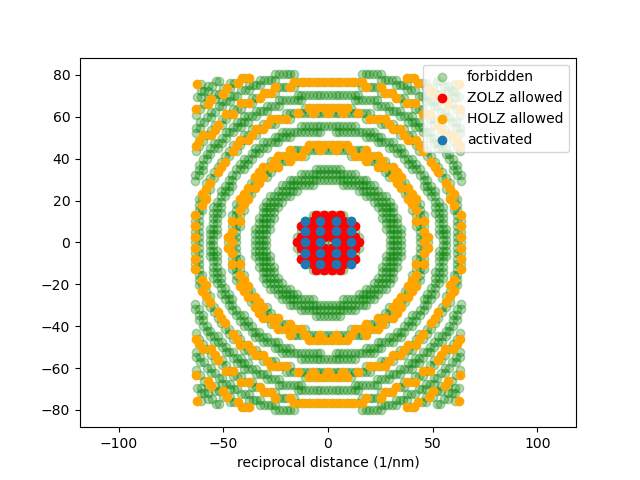

In [7]:
# ---- Input -----
rotation = np.radians(0)
# ----------------
ZOLZ = diff_dict['allowed']['ZOLZ']
HOLZ = diff_dict['allowed']['HOLZ']
r = diff_dict['allowed']['g'][:, 0]
phi = diff_dict['allowed']['g'][:, 1]

x = r *np.cos(phi+rotation)*10
y = r * np.sin(phi+rotation)*10


ZOLZ_forbidden = diff_dict['forbidden']['ZOLZ']
HOLZ_forbidden = diff_dict['forbidden']['HOLZ']
activated = (diff_dict['forbidden']['dynamically_activated'])

r_forbidden = diff_dict['forbidden']['g'][:, 0]
phi_forbidden = diff_dict['forbidden']['g'][:, 1]
x_forbidden = r_forbidden *np.cos(phi_forbidden+rotation)*10
y_forbidden = r_forbidden *np.sin(phi_forbidden+rotation)*10

x_dynamic = x_forbidden[ZOLZ_forbidden][activated]
y_dynamic = y_forbidden[ZOLZ_forbidden][activated]


plt.figure()
plt.scatter(x_forbidden, y_forbidden, label='forbidden', c='green', alpha = .3 )
plt.scatter(x[ZOLZ], y[ZOLZ], label='ZOLZ allowed', c='r')
plt.scatter(x[HOLZ], y[HOLZ], label="HOLZ allowed", c ='orange')


plt.scatter(x_dynamic, y_dynamic, label='activated')
plt.axis('equal')
plt.xlabel('reciprocal distance (1/nm)')
plt.legend();


### Plotting in Polar Coordinates

Like for ring-diffraction pattern, it is illustrative to look at the diffraction pattern in polar coordinates.

You will notece that we internally use only polar cooredinates.

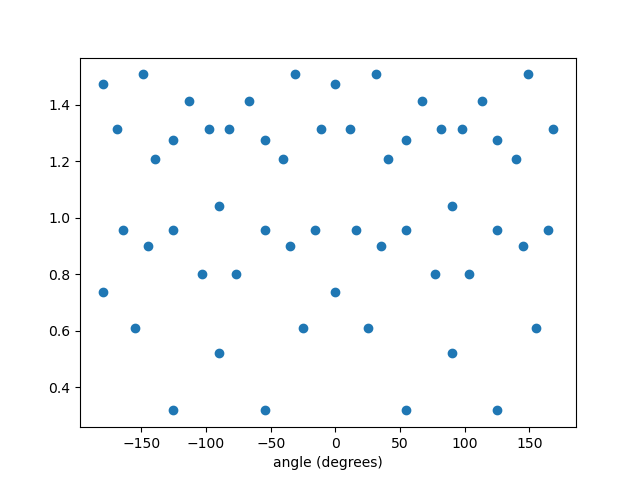

In [8]:
# ---- Input -----
rotation = np.radians(-10)
# ----------------
ZOLZ = diff_dict['allowed']['ZOLZ']
HOLZ = diff_dict['allowed']['HOLZ']
r = diff_dict['allowed']['g'][:, 0]
phi = diff_dict['allowed']['g'][:, 1]

plt.figure()
plt.scatter( np.degrees(phi)[ZOLZ], r[ZOLZ])
plt.xlabel('angle (degrees)');


### Plot Kikuchi Pattern
With the knowledge that the slope $m = \tan(\phi)$
we can plot the  perpendicular bisector of the line from origin to the Bragg peaks which are the Kikuchi lines.

Text(0.5, 0, 'reciprocal distance (1/nm)')

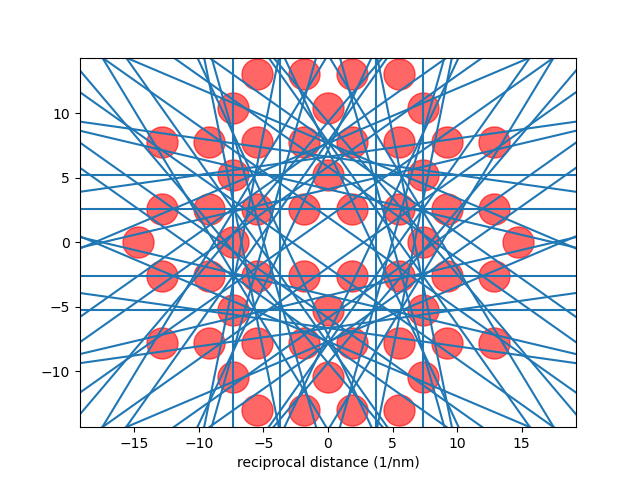

In [9]:
# ---- Input -----
rotation = np.radians(0)
size = 500 # mrad
# ----------------
ZOLZ = diff_dict['allowed']['ZOLZ']

r = diff_dict['allowed']['g'][ZOLZ, 0] * 10  # now in 1/nm
phi = diff_dict['allowed']['g'][ZOLZ, 1]

x = r *np.cos(phi+rotation)
y = r * np.sin(phi+rotation)
plt.figure()
plt.scatter(x,y, s=size, alpha = .6, c= 'r')
for i, ph in enumerate(phi-np.pi/2): 
    plt.axline( (x[i]/2,y[i]/2),slope=(np.tan(ph)))
plt.axis('equal')
plt.xlabel('reciprocal distance (1/nm)')

Or with the help of a function and the HOLZ line equation for d_theta ($\Delta \theta$) in the zero order Laue zone (ZOLZ)

d_theta in units of length is stored in the 4th dimension of the g vector for convenience.

In [10]:
def plotting_coordinates(g, rotation=0, feature='spot'):
    if feature == 'line':
        # Note: d_theta in g{: 3] is negative so we need to rotate phi by 180 degree
        x = g[:, 3] * np.cos(g[:, 1]+np.pi+rotation)*10
        y = g[:, 3] * np.sin(g[:, 1]+np.pi+rotation)*10
        return np.stack((x, y, np.tan(g[:, 1]+rotation-np.pi/2)), axis= 1)

    x = g[:, 0] * np.cos(g[:, 1]+rotation)*10
    y = g[:, 0] * np.sin(g[:, 1]+rotation)*10
    return np.stack((x, y), axis= 1) 

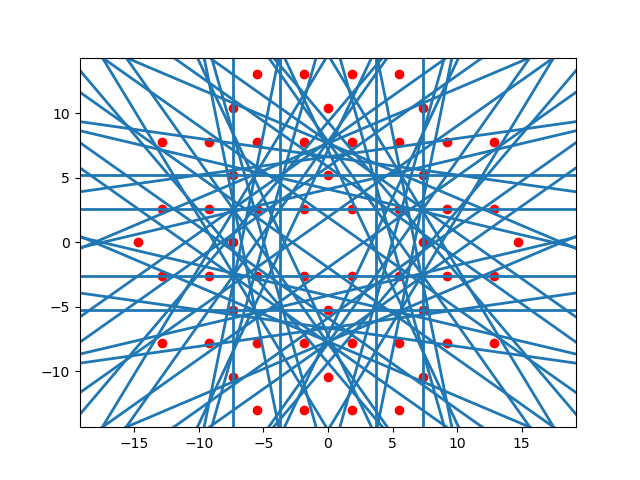

In [13]:
ZOLZ = diff_dict['allowed']['ZOLZ']

xy = plotting_coordinates(diff_dict['allowed']['g'][ZOLZ], feature='spot')
kikuchi = plotting_coordinates(diff_dict['allowed']['g'], feature='line')
plt.figure()
plt.scatter(xy[:, 0], xy[:,1], color = 'r')
for line in kikuchi[ZOLZ]:
    plt.axline( (line[0], line[1]),slope=line[2], linewidth = 2)

plt.axis('equal');

## Plot HOLZ Lines

Because, we calculated the $d\theta$ for all reflections, we do not need to do anything else for HOLZ lines

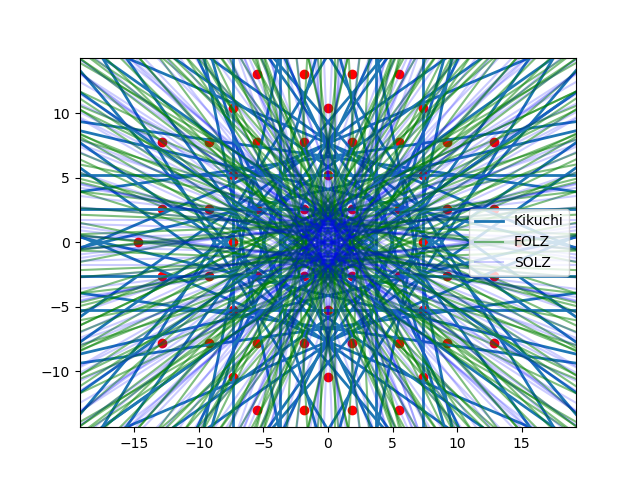

In [14]:
ZOLZ = diff_dict['allowed']['ZOLZ']
FOLZ = diff_dict['allowed']['FOLZ']
SOLZ = diff_dict['allowed']['SOLZ']
xy = plotting_coordinates(diff_dict['allowed']['g'][ZOLZ], feature='spot')
kikuchi = plotting_coordinates(diff_dict['allowed']['g'], feature='line')
plt.figure()
plt.scatter(xy[:, 0], xy[:,1], color = 'r')
line = (kikuchi[ZOLZ])[0]
plt.axline( (line[0], line[1]), slope=line[2], linewidth=2, label='Kikuchi')
for line in kikuchi[ZOLZ]:
    plt.axline( (line[0], line[1]), slope=line[2], linewidth=2)
line = (kikuchi[FOLZ])[0]
plt.axline( (line[0], line[1]), slope=line[2], color='g', alpha=0.5, label='FOLZ')
for line in kikuchi[FOLZ]:
    plt.axline( (line[0], line[1]),slope=line[2], color='g', alpha=0.5)

line = (kikuchi[SOLZ])[0]
plt.axline( (line[0], line[1]), slope=line[2], color='b', alpha=0.2, label='SOLZ')
for line in kikuchi[SOLZ]:
    plt.axline( (line[0], line[1]), slope=line[2], color='b', alpha = 0.2)
plt.axis('equal')
plt.legend();

### HOLZ lines in Higher Order Zone Axis

Of the 6858 tested reciprocal lattice points 156 have an excitation error less than 0.30 1/nm
Of the 156 possible reflection 28 are allowed.
Of those, there are 4 in ZOLZ  and 24 in HOLZ
Of the 46 forbidden reflection in ZOLZ  0 can be dynamically activated.


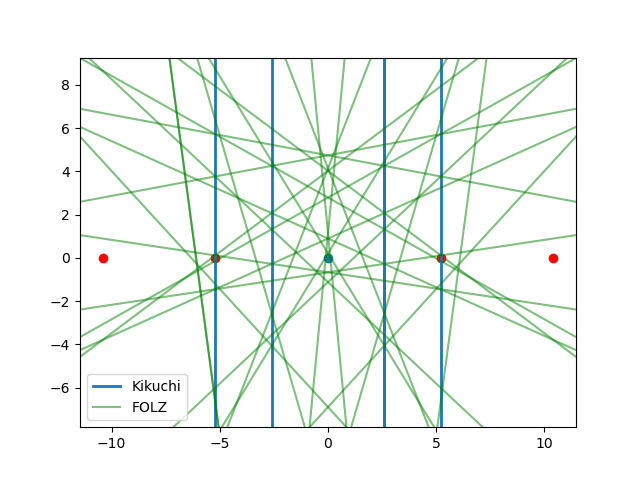

In [147]:
tags = {'acceleration_voltage_V': 99.2 * 1000.0,  # V
      'convergence_angle_mrad': 7.15,  # mrad;
      'zone_hkl': np.array([1, 2, -2]),
      'mistilt': np.array([0, 0, 0]),  # mistilt in degrees
      'Sg_max': .03,  # 1/A  maximum allowed excitation error
      'hkl_max': 9}  # Highest evaluated Miller indices

diff_dict = {}
diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags, verbose=True) 


ZOLZ = diff_dict['allowed']['ZOLZ']
FOLZ = diff_dict['allowed']['FOLZ']
SOLZ = diff_dict['allowed']['SOLZ']
xy = plotting_coordinates(diff_dict['allowed']['g'][ZOLZ], feature='spot')
kikuchi = plotting_coordinates(diff_dict['allowed']['g'], feature='line')
plt.figure()
plt.scatter(xy[:, 0], xy[:,1], color = 'r')
line = (kikuchi[ZOLZ])[0]
plt.axline( (line[0], line[1]), slope=line[2], linewidth=2, label='Kikuchi')
for line in kikuchi[ZOLZ]:
    plt.axline( (line[0], line[1]), slope=line[2], linewidth=2)
line = (kikuchi[FOLZ])[0]
plt.axline( (line[0], line[1]), slope=line[2], color='g', alpha=0.5, label='FOLZ')
for line in kikuchi[FOLZ]:
    plt.axline( (line[0], line[1]),slope=line[2], color='g', alpha=0.5)
if SOLZ.sum()>0:
    line = (kikuchi[SOLZ])[0]
    plt.axline( (line[0], line[1]), slope=line[2], color='b', alpha=0.2, label='SOLZ')
    for line in kikuchi[SOLZ]:
        plt.axline( (line[0], line[1]), slope=line[2], color='b', alpha = 0.2)
plt.axis('equal')
plt.scatter(0,0)
plt.legend();

In [149]:
diff_dict['K_0']

np.float64(27.021910916479413)

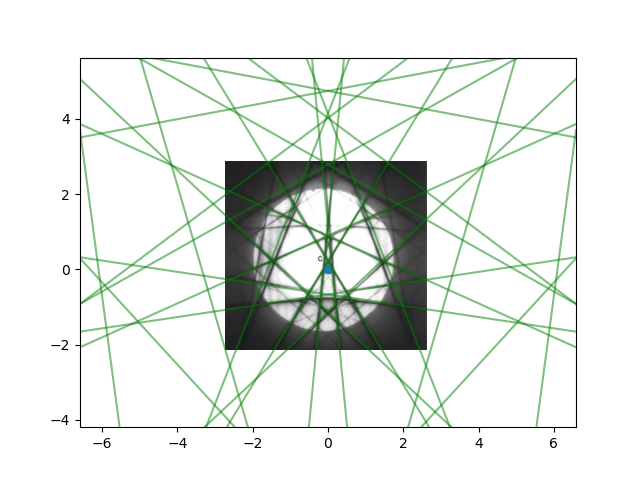

In [17]:
image = plt.imread('./Zuo-HOLZ-experiment.jpg')
plt.figure()
extent = np.array([-2.7006,  2.8206, -2.15  ,  3.01  ])
extent[:2] -= 0.125
extent[2:] -= 0.06

extent /=1.03
plt.imshow(image, extent=extent)
plt.axis('auto')
for line in kikuchi[FOLZ]:
    plt.axline( (line[0], line[1]),slope=line[2], color='g', alpha=0.5)
if SOLZ.sum()>0:
    line = (kikuchi[SOLZ])[0]
    plt.axline( (line[0], line[1]), slope=line[2], color='b', alpha=0.2, label='SOLZ')
    for line in kikuchi[SOLZ]:
        plt.axline( (line[0], line[1]), slope=line[2], color='b', alpha = 0.2)

plt.scatter(0,0)
plt.xlim(-2.5,2)
plt.ylim(-2,2.5)
plt.axis('equal')
extent;

Or with a few more lines (higher hkl_max)

Of the 29790 tested reciprocal lattice points 421 have an excitation error less than 0.30 1/nm
Of the 421 possible reflection 79 are allowed.
Of those, there are 4 in ZOLZ  and 75 in HOLZ
Of the 46 forbidden reflection in ZOLZ  0 can be dynamically activated.


array([-2.74330097,  2.61708738, -2.14563107,  2.86407767])

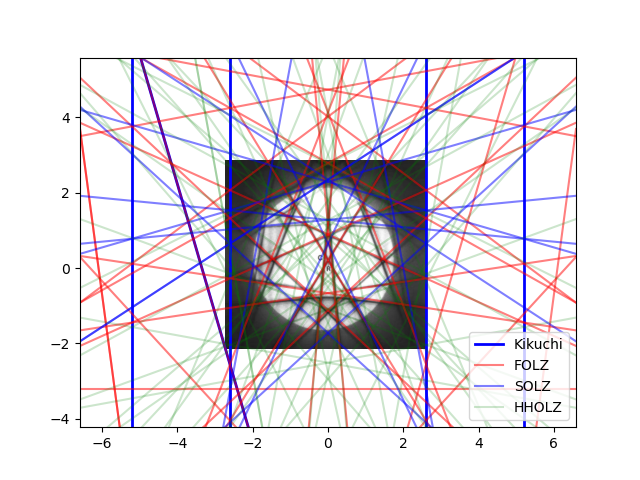

In [18]:
tags = {'acceleration_voltage_V': 99.2 * 1000.0,  # V
      'convergence_angle_mrad': 7.15,  # mrad;
      'zone_hkl': np.array([1, 2, -2]),
      'mistilt': np.array([0, 0, 0]),  # mistilt in degrees
      'Sg_max': .03,  # 1/A  maximum allowed excitation error
      'hkl_max': 15}  # Highest evaluated Miller indices

diff_dict = {}
diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags, verbose=True) 

zolz = diff_dict['allowed']['ZOLZ']
folz = diff_dict['allowed']['FOLZ']
solz = diff_dict['allowed']['SOLZ']
hholz = diff_dict['allowed']['HOLZ_plus']

xy = plotting_coordinates(diff_dict['allowed']['g'][zolz], feature='spot')
kikuchi = plotting_coordinates(diff_dict['allowed']['g'], feature='line')
plt.close('all')
plt.figure()
extent = np.array([-2.7006,  2.8206, -2.15  ,  3.01  ])
extent[:2] -= 0.125
extent[2:] -= 0.06
extent /=1.03
plt.imshow(image, extent=extent)
plt.axis('auto')
plt.axline( (line[0], line[1]), slope=line[2], color='b', alpha=1, linewidth =2, label='Kikuchi')
for line in kikuchi[zolz]:
    plt.axline( (line[0], line[1]),slope=line[2], color='b', alpha=1, linewidth =2)
if folz.sum()>0:
    line = (kikuchi[folz])[0]
    plt.axline( (line[0], line[1]), slope=line[2], color='r', alpha=0.5, label='FOLZ')
    for line in kikuchi[folz]:
        plt.axline( (line[0], line[1]), slope=line[2], color='r', alpha = 0.5)    
if solz.sum()>0:
    line = (kikuchi[solz])[0]
    plt.axline( (line[0], line[1]), slope=line[2], color='b', alpha=0.5, label='SOLZ')
    for line in kikuchi[solz]:
        plt.axline( (line[0], line[1]), slope=line[2], color='b', alpha = 0.5)
if hholz.sum()>0:
    line = (kikuchi[hholz])[0]
    plt.axline( (line[0], line[1]), slope=line[2], color='g', alpha=0.2, label='HHOLZ')
    for line in kikuchi[hholz]:
        plt.axline( (line[0], line[1]), slope=line[2], color='g', alpha = 0.2)

plt.legend()
plt.axis('equal')
extent

## Calculation and Plotting with pyTEMlib
The parameters controlling the plotting output are defined in the 'output' subdictionory.

Default values are applied.

In [142]:
def plot_lines(lines, color, alpha, linewidth, label, indices=None):
    if isinstance(alpha, float):
        alpha = [alpha]* len(lines)
    line = lines[0]
    plt.axline( (line[0], line[1]), slope=line[2], color=color, alpha=alpha[0], label=label, linewidth=linewidth[0])
    for i, line in enumerate(lines):
        if i > 0:
            plt.axline( (line[0], line[1]), slope=line[2], color=color, alpha=alpha[i], linewidth=linewidth[i])  
            if indices is not None:
                plt.text(line[0], line[1], (hkl_label[zone])[i], fontsize=8)
                        
def plot_diffraction_pattern(atoms, diffraction_pattern=None):
    """
    Plot of spot diffraction pattern with matplotlib

    Parameters
    ----------
    atoms: dictionary or ase.Atoms object
        information stored as dictionary either directly or in info attribute of ase.Atoms object
    diffraction_pattern: None or sidpy.Dataset
        diffraction pattern in background
    grey: bool
        plotting in greyscale if True
        
    Returns
    -------
    fig: matplotlib figure
        reference to matplotlib figure
    """

    if isinstance(atoms, dict):
        tags_out = atoms

    elif isinstance(atoms, ase.Atoms):
        if 'diffraction' in atoms.info:
            tags_out = atoms.info['diffraction']
            # plot_diffraction_pattern = True
        else:
            raise TypeError('Diffraction information must be in info dictionary',
                            ' of ase.Atoms object')
    else:
        raise TypeError('Diffraction info must be in ase.Atoms object or dictionary form')


    # Get information from dictionary
    zolz = tags_out['allowed']['ZOLZ']
    folz = tags_out['allowed']['FOLZ']
    solz = tags_out['allowed']['SOLZ']
    holz = tags_out['allowed']['HOLZ']
    hholz = tags_out['allowed']['HOLZ_plus']
    
    laue_zone = tags_out['allowed']['Laue_Zone']
    laue_zones = [zolz, folz, solz, hholz]
    laue_circle = tags_out.get('Laue_circle', [0,0, 0, 0])
    hkl_label = tags_out['allowed']['hkl']
    label = tags_out['allowed'].get('label', hkl_label)
    
    rotation = np.radians(tags_out.setdefault('output', {}).get('plot_rotation', 0))  # rad
    
    points = plotting_coordinates(tags_out['allowed']['g'] + laue_circle, feature='spot')
    lines = plotting_coordinates(tags_out['allowed']['g'] + laue_circle, feature='line')

    tags_out.setdefault('thickness', 0) 
    if tags_out['thickness'] > 0.1:
        intensity = np.real(tags_out['allowed']['Ig'])
    else:
        intensity = tags_out['allowed']['intensities']
    radius = tags_out.setdefault('experimental', {}).setdefault('convergence_angle', 0)
    if radius < 0.1:
        radius_i = 2
    else:
        radius_i = radius
    
    if tags_out['output'].setdefault('linewidth_Kikuchi', 1) < 0:
        if len(intensity[zolz]) > 0:
            intensity_kikuchi = intensity * 4. / intensity[zolz].max()
        else:
            intensity_kikuchi = intensity
    else:
        intensity_kikuchi = np.ones(len(intensity)) * tags_out['output']['linewidth_Kikuchi']

    if tags_out.setdefault('output', {}).setdefault('linewidth_HOLZ', 1)  < 0:
        intensity_holz = np.log(intensity + 1)
    else:
        intensity_holz = np.ones(len(intensity)) * tags_out['output']['linewidth_HOLZ']

    # #######
    # Plot #
    # #######
    cm = plt.get_cmap(tags_out['output'].setdefault('color_map', 'gnuplot'))

    fig = plt.figure()

    ax = plt.gca()
    if tags_out['output'].setdefault('background', None) is not None:
        ax.set_facecolor(tags_out['output']['background'])

    if diffraction_pattern is not None:
        plt.imshow(diffraction_pattern, extent=diffraction_pattern.get_extent([0, 1]), cmap='gray')


    def onpick(event):
        if isinstance(event.artist, Line2D):
            thisline = event.artist
            ind = ax.lines.index(thisline)
            print(ind, len(points), ind - len(points))
            # ind = ind- len(points)
            h, k, l = line_label[ind]

            if laue_zone[ind] > 0:
                label_p = f'Laue Zone {laue_zone[ind]:d}; HOLZ line: [{h:d},{k:d},{l:d}]'
            else:
                label_p = f'Kikuchi line: [{h:d},{k:d},{l:d}]'
            print(label_p)

        elif isinstance(event.artist, matplotlib.patches.Circle):
            print('Circle')

        else:
            ind = event.ind[0]
            h, k, l = reflection[ind]

            print(f'Reflection: [{h:d},{k:d},{l:d}]')

    laue_color = []
    for i in range(len(laue_zones)):
        if i < len(tags_out['output'].setdefault('color_Laue_Zones', ['blue', 'red', 'green', 'orange'])):
            laue_color.append(tags_out['output']['color_Laue_Zones'][i])
        else:
            laue_color.append(tags_out['output']['color_Laue_Zones'][-1])

    tags_out['output'].setdefault('plot_labels', False)
    
    if tags_out['output'].setdefault('plot_reflections', True):
        if radius < 0.01:
            if tags_out['output'].setdefault('color_reflections', None) == 'intensity':
                ax.scatter(points[:, 0], points[:, 1],
                               c=np.log(intensity[i] + 1), cmap=cm, s=100)

                if tags_out['output']['plot_labels']:
                    plt.text(points[i, 0], points[i, 1], label[i], fontsize=10)
            else:
                for i, zone in enumerate(laue_zones):
                    color = laue_color[i]
                    ax.scatter(points[zone, 0], points[zone, 1], c=color, s=100)
                    if tags_out['output']['plot_labels']:
                        plt.text(points[zone, 0], points[zone, 1], label[i], fontsize=8)

            ax.scatter(laue_circle[0], laue_circle[1], c=tags_out['output'].setdefault('color_zero', 'blue'), s=100) # TODO in right coordinates
            radius = .2
        else:
            if tags_out['output'].setdefault('color_reflections', None) == 'intensity':
                circles(points[:, 0], points[:, 1], s=radius, c=np.log(inten + 1),
                        cmap=cm, alpha=0.9, edgecolor=None, picker=5)
            else:
                for i, zone in enumerate(laue_zones):
                    color = laue_color[i]
                    circles(points[zone, 0], points[zone, 1], s=radius, c=color, cmap=cm,
                            alpha=0.9, edgecolor='', picker=5)  #
                    #plt.text(points[i, 0], points[i, 1], label[i], fontsize=8)

    
    tags_out['output'].setdefault('plot_forbidden', False)
    
    points_forbidden = plotting_coordinates(tags_out['forbidden']['g'])
    if tags_out['output'].setdefault('plot_dynamically_allowed', False):
        if 'dynamically_allowed' not in atoms.info['diffraction']['forbidden']:
            print('To plot dynamically allowed reflections you must run the get_dynamically_allowed'
                  'function of kinematic_scattering library first!')
        else:
            
            dynamically_allowed = tags_out['forbidden']['dynamically_activated']
            dyn_allowed = points_forbidden[dynamically_allowed, :]
            
            color = laue_color[0]
            ax.scatter(dyn_allowed[:, 0], dyn_allowed[:, 1], c='blue', alpha=0.4, s=70)
            if tags_out['output']['plot_labels']:
                for i in range(len(dyn_allowed)):
                    dyn_label = tags_out['forbidden']['hkl'][dynamically_allowed, :]
                    plt.text(dyn_allowed[i, 0], dyn_allowed[i, 1], dyn_label[i], fontsize=8)
            if tags_out['output'].setdefault('plot_forbidden', False):
                forbidden_g = points_forbidden[np.logical_not(dynamically_allowed), :]
                forbidden_hkl = tags_out['forbidden']['hkl'][np.logical_not(dynamically_allowed), :]
                ax.scatter(forbidden_g[:, 0], forbidden_g[:, 1], c='orange', alpha=0.4, s=70)
                if tags_out['output']['plot_labels']:
                    for i in range(len(forbidden_g)):
                        plt.text(forbidden_g[i, 0], forbidden_g[i, 1], forbidden_hkl[i], fontsize=8)
    elif tags_out['output'].setdefault('plot_forbidden', False):
        forbidden_hkl = tags_out['forbidden']['hkl']
        ax.scatter(points_forbidden[:, 0], points_forbidden[:, 1], c='orange', alpha=0.4, s=70)
        if atoms.info['output']['plot_labels']:
            for i, g in enumerate(points_forbidden):
                plt.text(g[0], g[1], forbidden_hkl[i], fontsize=8)

    
    for i, zone in enumerate(laue_zones):
        if zone.sum() ==0:
            continue
        if i == 0:
            if tags_out['output'].setdefault('plot_Kikuchi', tags_out['output'].setdefault('plot_HOLZ', False)):
                if tags_out['output'].setdefault('label_HOLZ', False): 
                    label = (hkl_label[zone])[i]
                else:
                    label = None
                plot_lines(lines[zone], laue_color[i], 0.5, intensity_kikuchi, 'Kikuchi', label )
        else:
            if tags_out['output'].setdefault('plot_HOLZ', False):
                zone_names= ['Kiku', 'FOLZ', 'SOLZ', 'higher HOLZ']
                if tags_out['output'].setdefault('label_HOLZ', False): 
                    label = (hkl_label[zone])[i]
                else:
                    label = None
                plot_lines(lines[zone], laue_color[i], 0.6-i*0.1, intensity_holz[zone], zone_names[i], label)

            if tags_out['output'].setdefault('plot_HOLZ_excess', False):
                excess_s = tags_out['allowed']['g']
                excess_s[:, 3] = tags_out['allowed']['g'][:, 1] - tags_out['allowed']['g'][:, 3]
                excess_s[:, 1] += np.pi
                lines_excess = plotting_coordinates(excess_s, feature='line')
                plot_lines(lines_excess[zone], laue_color[i], 0.6-i*0.1, intensity_holz[zone], zone_names[i])


    """    if atoms.info['output']['plot_Kikuchi']:
            # Beginning and ends of Kikuchi lines
            if atoms.info['output']['label_Kikuchi']:
                label_kikuchi = []
                for i, text in enumerate(label):
                    if zolz[i]:
                        label_kikuchi.append(text)
            for i, k_x in enumerate(k_xp):
                _, = plt.plot((k_x, k_xm[i]), (k_yp[i], k_ym[i]),
                              c=atoms.info['output']['color_Kikuchi'], linewidth=2)
                if atoms.info['output']['label_Kikuchi']:  # Add indices
                    plt.text(k_xp[i], k_yp[i], label[i],
                             fontsize=atoms.info['output']['label_size'],
                             color=atoms.info['output']['label_color'])
    """
    def format_coord(x, y):
        return label_p + f'x={x:.4f}, y={y:.4f}'

    ax.format_coord = format_coord

    if tags_out['output'].setdefault('color_ring_zero', None) is not None:
        ring = plt.Circle(laue_circle, radius, color=tags_out['output']['color_ring_zero'],
                          fill=False, linewidth=2)
        ax.add_artist(ring)
    if tags_out['output'].setdefault('color_zero', None) is not None:
        circle = plt.Circle(laue_circle, radius, color=tags_out['output']['color_zero'], linewidth=2)
        ax.add_artist(circle)

    plt.axis('equal')
    if tags_out['output'].setdefault('plot_FOV', None):
        l = -tags_out['output']['plot_FOV'] / 2
        r = tags_out['output']['plot_FOV'] / 2
        t = -tags_out['output']['plot_FOV'] / 2
        b = tags_out['output']['plot_FOV'] / 2
        plt.xlim(l, r)
        plt.ylim(t, b)
        

    fig.canvas.mpl_connect('pick_event', onpick)
    # texfig.savefig("HOLZ")
    plt.legend()
    # plt.title( tags_out['crystal'])
    return fig

C:\Users\gduscher\AppData\Local\Temp\ipykernel_58460\2953192335.py:263: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


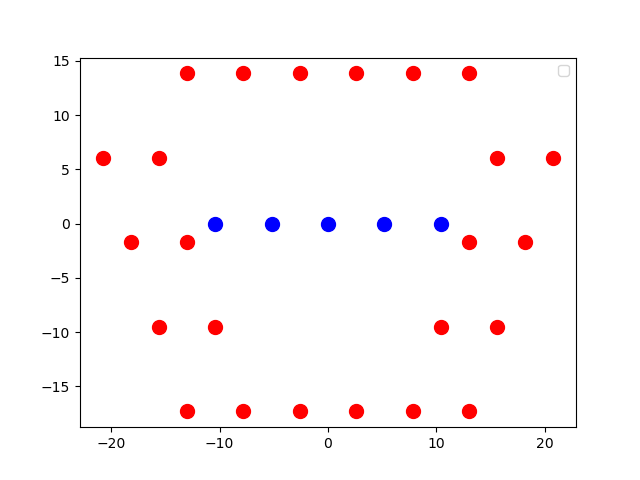

{'linewidth_Kikuchi': 1,
 'linewidth_HOLZ': 1,
 'color_map': 'gnuplot',
 'background': None,
 'color_Laue_Zones': ['blue', 'red', 'green', 'orange'],
 'plot_labels': False,
 'plot_reflections': True,
 'color_reflections': None,
 'color_zero': 'blue',
 'plot_forbidden': False,
 'plot_dynamically_allowed': False,
 'plot_HOLZ': False,
 'plot_Kikuchi': False,
 'plot_HOLZ_excess': False,
 'color_ring_zero': None,
 'plot_FOV': None}

In [174]:
tags = {'acceleration_voltage_V': 99.2 * 1000.0,  # V
      'convergence_angle_mrad': 7.15,  # mrad;
      'zone_hkl': np.array([1, 2, -2]),
      'mistilt': np.array([0, 0, 0]),  # mistilt in degrees
      'Sg_max': .03,  # 1/A  maximum allowed excitation error
      'hkl_max': 9}  # Highest evaluated Miller indices

diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags) 
diff_dict['output'] = {}
plot_diffraction_pattern(diff_dict, diffraction_pattern=None)
diff_dict['output']

In [192]:
def circles(x, y, s, c='b', vmin=None, vmax=None, **kwargs):
    """
    Make a scatter plot of circles.
    Similar to plt.scatter, but the size of circles are in data scale.
    Parameters
    ----------
    x, y : scalar or array_like, shape (n, )
        Input data
    s : scalar or array_like, shape (n, )
        Radius of circles.
    c : color or sequence of color, optional, default : 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs.
        Note that `c` should not be a single numeric RGB or RGBA sequence
        because that is indistinguishable from an array of values
        to be colormapped. (If you insist, use `color` instead.)
        `c` can be a 2-D array in which the rows are RGB or RGBA, however.
    vmin, vmax : scalar, optional, default: None
        `vmin` and `vmax` are used in conjunction with `norm` to normalize
        luminance data.  If either are `None`, the min and max of the
        color array is used.
    kwargs : `~matplotlib.collections.Collection` properties
        Eg. alpha, edgecolor(ec), facecolor(fc), linewidth(lw), linestyle(ls),
        norm, cmap, transform, etc.
    Returns
    -------
    paths : `~matplotlib.collections.PathCollection`
    Examples
    --------
    a = np.arange(11)
    circles(a, a, s=a*0.2, c=a, alpha=0.5, ec='none')
    plt.colorbar()
    License
    --------
    This code is under [The BSD 3-Clause License]
    (http://opensource.org/licenses/BSD-3-Clause)
    """

    
    if np.isscalar(c):
        kwargs.setdefault('color', c)
        c = None
    
    if 'fc' in kwargs:
        kwargs.setdefault('facecolor', kwargs.pop('fc', None))
    if 'ec' in kwargs:
        kwargs.setdefault('edgecolor', kwargs.pop('ec', None))
    if 'ls' in kwargs:
        kwargs.setdefault('linestyle', kwargs.pop('ls', None))
    if 'lw' in kwargs:
        kwargs.setdefault('linewidth', kwargs.pop('lw', None))

    zipped = np.broadcast(x, y, s)
    patches = [matplotlib.patches.Circle((x_, y_), s_, picker=True)
               for x_, y_, s_ in zipped]
    collection = matplotlib.collections.PatchCollection(patches, **kwargs)
    if c is not None:
        c = np.broadcast_to(c, zipped.shape).ravel()
        collection.set_array(c)
        collection.set_clim(vmin, vmax)

    ax = plt.gca()
    ax.add_collection(collection)
    ax.autoscale_view()
    plt.draw_if_interactive()
    if c is not None:
        plt.sci(collection)
    return collection
    
def plot_diffraction_pattern(atoms, diffraction_pattern=None):
    """
    Plot of spot diffraction pattern with matplotlib

    Parameters
    ----------
    atoms: dictionary or ase.Atoms object
        information stored as dictionary either directly or in info attribute of ase.Atoms object
    diffraction_pattern: None or sidpy.Dataset
        diffraction pattern in background
    grey: bool
        plotting in greyscale if True
        
    Returns
    -------
    fig: matplotlib figure
        reference to matplotlib figure
    """

    if isinstance(atoms, dict):
        tags_out = atoms

    elif isinstance(atoms, ase.Atoms):
        if 'diffraction' in atoms.info:
            tags_out = atoms.info['diffraction']
            # plot_diffraction_pattern = True
        else:
            raise TypeError('Diffraction information must be in info dictionary',
                            ' of ase.Atoms object')
    else:
        raise TypeError('Diffraction info must be in ase.Atoms object or dictionary form')

    # Get information from dictionary
    zolz = tags_out['allowed']['ZOLZ']
    folz = tags_out['allowed']['FOLZ']
    solz = tags_out['allowed']['SOLZ']
    # holz = tags_out['allowed']['HOLZ']
    hholz = tags_out['allowed']['HOLZ_plus']

    laue_zone = tags_out['allowed']['Laue_Zone']
    laue_zones = [zolz, folz, solz, hholz]
    laue_circle = tags_out.get('Laue_circle', [0,0, 0, 0])
    hkl_label = tags_out['allowed']['hkl']
    label = tags_out['allowed'].get('label', hkl_label)

    rotation = np.radians(tags_out.setdefault('output', {}).get('plot_rotation', 0))  # rad
    g_vectors = tags_out['allowed']['g'] + laue_circle + [0, rotation, 0 , 0]
    points = plotting_coordinates(g_vectors, feature='spot')
    lines = plotting_coordinates(g_vectors, feature='line')

    tags_out.setdefault('thickness', 0)
    if tags_out['thickness'] > 0.1:
        intensity = np.real(tags_out['allowed']['Ig'])
    else:
        intensity = tags_out['allowed']['intensities']
    radius = tags_out.setdefault('experimental', {}).setdefault('convergence_angle', 0)
    if radius < 0.1:
        radius = 2

    if tags_out['output'].setdefault('linewidth_Kikuchi', 1) < 0:
        if len(intensity[zolz]) > 0:
            intensity_kikuchi = intensity * 4. / intensity[zolz].max()
        else:
            intensity_kikuchi = intensity
    else:
        intensity_kikuchi = np.ones(len(intensity)) * tags_out['output']['linewidth_Kikuchi']

    if tags_out.setdefault('output', {}).setdefault('linewidth_HOLZ', 1)  < 0:
        intensity_holz = np.log(intensity + 1)
    else:
        intensity_holz = np.ones(len(intensity)) * tags_out['output']['linewidth_HOLZ']

    # #######
    # Plot #
    # #######
    cm = plt.get_cmap(tags_out['output'].setdefault('color_map', 'gnuplot'))

    fig = plt.figure()

    ax = plt.gca()
    if tags_out['output'].setdefault('background', None) is not None:
        ax.set_facecolor(tags_out['output']['background'])

    if diffraction_pattern is not None:
        plt.imshow(diffraction_pattern, extent=diffraction_pattern.get_extent([0, 1]), cmap='gray')

    def onpick(event):
        if isinstance(event.artist, Line2D):
            thisline = event.artist
            ind = ax.lines.index(thisline)
            print(ind, len(points), ind - len(points))
            # ind = ind- len(points)
            # h, k, l = line_label[ind]

            # if laue_zone[ind] > 0:
            #     label_p = f'Laue Zone {laue_zone[ind]:d}; HOLZ line: [{h:d},{k:d},{l:d}]'
            # else:
            #    label_p = f'Kikuchi line: [{h:d},{k:d},{l:d}]'
            # print(label_p)

        elif isinstance(event.artist, matplotlib.patches.Circle):
            print('Circle')

        else:
            ind = event.ind[0]
            h, k, l = g_vectors[ind]

            print(f'Reflection: [{h:d},{k:d},{l:d}]')

    laue_color = []
    for i in range(len(laue_zones)):
        if i < len(tags_out['output'].setdefault('color_Laue_Zones',
                                                 ['blue', 'red', 'green', 'orange'])):
            laue_color.append(tags_out['output']['color_Laue_Zones'][i])
        else:
            laue_color.append(tags_out['output']['color_Laue_Zones'][-1])
    tags_out['output'].setdefault('plot_labels', False)

    if tags_out['output'].setdefault('plot_reflections', True):
        if radius < 0.01:
            if tags_out['output'].setdefault('color_reflections', None) == 'intensity':
                ax.scatter(points[:, 0], points[:, 1],
                               c=np.log(intensity[i] + 1), cmap=cm, s=100)

                if tags_out['output']['plot_labels']:
                    plt.text(points[i, 0], points[i, 1], label[i], fontsize=10)
            else:
                for i, zone in enumerate(laue_zones):
                    color = laue_color[i]
                    ax.scatter(points[zone, 0], points[zone, 1], c=color, s=100)
                    if tags_out['output']['plot_labels']:
                        plt.text(points[zone, 0], points[zone, 1], label[i], fontsize=8)
            # TODO in right coordinates
            ax.scatter(laue_circle[0], laue_circle[1],
                       c=tags_out['output'].setdefault('color_zero', 'blue'), s=100)
            radius = .2
        else:
            if tags_out['output'].setdefault('color_reflections', None) == 'intensity':
                circles(points[:, 0], points[:, 1], s=radius, c=np.log(intensity[:] + 1),
                        cmap=cm, alpha=0.9, edgecolor=None, picker=5)
            else:
                for i, zone in enumerate(laue_zones):
                    color = laue_color[i]
                    circles(points[zone, 0], points[zone, 1], s=radius, c=color, cmap=cm,
                            alpha=0.9, edgecolor=None, picker=5)  #
                    #plt.text(points[i, 0], points[i, 1], label[i], fontsize=8)

    tags_out['output'].setdefault('plot_forbidden', False)

    points_forbidden = plotting_coordinates(tags_out['forbidden']['g'])
    if tags_out['output'].setdefault('plot_dynamically_allowed', False):
        if 'dynamically_allowed' not in atoms.info['diffraction']['forbidden']:
            print('To plot dynamically allowed reflections you must run the get_dynamically_allowed'
                  'function of kinematic_scattering library first!')
        else:
            dynamically_allowed = tags_out['forbidden']['dynamically_activated']
            dyn_allowed = points_forbidden[dynamically_allowed]
            color = laue_color[0]
            ax.scatter(dyn_allowed[:, 0], dyn_allowed[:, 1], c='blue', alpha=0.4, s=70)
            if tags_out['output']['plot_labels']:
                for i in range(len(dyn_allowed)):
                    dyn_label = tags_out['forbidden']['hkl'][dynamically_allowed, :]
                    plt.text(dyn_allowed[i, 0], dyn_allowed[i, 1], dyn_label[i], fontsize=8)
            if tags_out['output'].setdefault('plot_forbidden', False):
                forbidden_g = points_forbidden[np.logical_not(dynamically_allowed), :]
                forbidden_hkl = tags_out['forbidden']['hkl'][np.logical_not(dynamically_allowed), :]
                ax.scatter(forbidden_g[:, 0], forbidden_g[:, 1], c='orange', alpha=0.4, s=70)
                if tags_out['output']['plot_labels']:
                    for i in range(len(forbidden_g)):
                        plt.text(forbidden_g[i, 0], forbidden_g[i, 1], forbidden_hkl[i], fontsize=8)
    elif tags_out['output'].setdefault('plot_forbidden', False):
        forbidden_hkl = tags_out['forbidden']['hkl']
        ax.scatter(points_forbidden[:, 0], points_forbidden[:, 1], c='orange', alpha=0.4, s=70)
        if atoms.info['output']['plot_labels']:
            for i, g in enumerate(points_forbidden):
                plt.text(g[0], g[1], forbidden_hkl[i], fontsize=8)

    for i, zone in enumerate(laue_zones):
        if zone.sum() ==0:
            continue
        if i == 0:
            if tags_out['output'].setdefault('plot_Kikuchi',
                                             tags_out['output'].setdefault('plot_HOLZ', False)):
                if tags_out['output'].setdefault('label_HOLZ', False):
                    label = (hkl_label[zone])[i]
                else:
                    label = None
                plot_lines(lines[zone], laue_color[i], 0.5, intensity_kikuchi, 'Kikuchi', label )
        else:
            if tags_out['output'].setdefault('plot_HOLZ', False):
                zone_names= ['Kiku', 'FOLZ', 'SOLZ', 'higher HOLZ']
                if tags_out['output'].setdefault('label_HOLZ', False):
                    label = (hkl_label[zone])[i]
                else:
                    label = None
                plot_lines(lines[zone], laue_color[i], 0.6-i*0.1, intensity_holz[zone],
                           zone_names[i], label)

            if tags_out['output'].setdefault('plot_HOLZ_excess', False):
                excess_s = tags_out['allowed']['g']
                excess_s[:, 3] = tags_out['allowed']['g'][:, 1] - tags_out['allowed']['g'][:, 3]
                excess_s[:, 1] += np.pi
                lines_excess = plotting_coordinates(excess_s, feature='line')
                plot_lines(lines_excess[zone], laue_color[i], 0.6-i*0.1,
                           intensity_holz[zone],
                           zone_names[i])


    """    if atoms.info['output']['plot_Kikuchi']:
            # Beginning and ends of Kikuchi lines
            if atoms.info['output']['label_Kikuchi']:
                label_kikuchi = []
                for i, text in enumerate(label):
                    if zolz[i]:
                        label_kikuchi.append(text)
            for i, k_x in enumerate(k_xp):
                _, = plt.plot((k_x, k_xm[i]), (k_yp[i], k_ym[i]),
                              c=atoms.info['output']['color_Kikuchi'], linewidth=2)
                if atoms.info['output']['label_Kikuchi']:  # Add indices
                    plt.text(k_xp[i], k_yp[i], label[i],
                             fontsize=atoms.info['output']['label_size'],
                             color=atoms.info['output']['label_color'])
    """
    def format_coord(x, y):
        return  f'x={x:.4f}, y={y:.4f}' # label_p + f'x={x:.4f}, y={y:.4f}'

    ax.format_coord = format_coord

    if tags_out['output'].setdefault('color_ring_zero', None) is not None:
        ring = plt.Circle(laue_circle, radius, color=tags_out['output']['color_ring_zero'],
                          fill=False, linewidth=2)
        ax.add_artist(ring)
    if tags_out['output'].setdefault('color_zero', None) is not None:
        circle = plt.Circle(laue_circle, radius,
                            color=tags_out['output']['color_zero'],
                            linewidth=2)
        ax.add_artist(circle)

    plt.axis('equal')
    if tags_out['output'].setdefault('plot_FOV', None):
        l = -tags_out['output']['plot_FOV'] / 2
        r = tags_out['output']['plot_FOV'] / 2
        t = -tags_out['output']['plot_FOV'] / 2
        b = tags_out['output']['plot_FOV'] / 2
        plt.xlim(l, r)
        plt.ylim(t, b)

    fig.canvas.mpl_connect('pick_event', onpick)
    # texfig.savefig("HOLZ")
    plt.legend()
    # plt.title( tags_out['crystal'])
    return fig


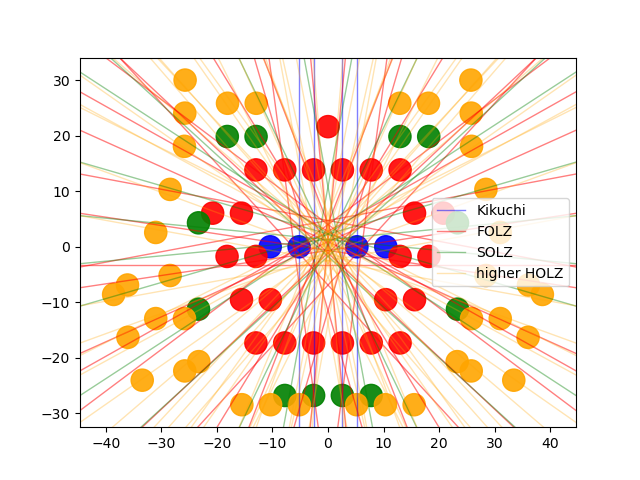

In [193]:
import matplotlib
diff_dict['output']['plot_HOLZ'] = True
diff_dict['output']['plot_Kikuchi'] = True

fig =plot_diffraction_pattern(diff_dict, diffraction_pattern=None)

## Conclusion
The scattering geometry provides all the tools to determine which reciprocal lattice points are possible and which of them are allowed.

The diffraction pattern is a projection onto the plane perpendicular to the zone axis. For an easy projection we tilt everything so that the x,y plane  is our projection plane.

Determination of Bragg reflections in polar coordinates allows for easy rotation in plane and calculation of Kikuchi and HOLZ lines.


In [166]:
plt.close('all')


##########################
# Start of Example Input #
##########################

Define only mandatory input:  ['acceleration_voltage', 'zone_hkl', 'Sg_max', 'hkl_max']
 Kinematic diffraction routine will set optional input :  ['crystal', 'lattice_parameter_nm', 'convergence_angle_mrad', 'mistilt', 'thickness', 'dynamic correction', 'dynamic correction K0']


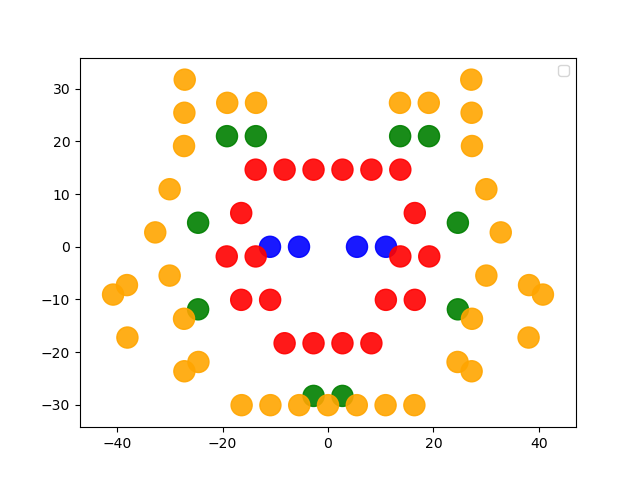

In [195]:
atoms = pyTEMlib.diffraction_tools.example(verbose=False)

diff_dict = {}
diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags, verbose=False)
saed_tags = pyTEMlib.diffraction_tools.plot_saed_parameter()
saed_tags['width_ring_zero'] = 0
fig = pyTEMlib.diffraction_tools.plot_diffraction_pattern(diff_dict)
#self.assertIsInstance(fig, matplotlib.figure.Figure)


In [168]:
saed_tags['width_ring_zero'] = 0

{'convergence_angle_A-1': 0,
 'background': 'white',
 'color_map': 'plasma',
 'color_reflections': 'intensity',
 'plot_HOLZ': 0,
 'plot_HOLZ_excess': 0,
 'plot_Kikuchi': 1,
 'plot_reflections': 1,
 'color_Kikuchi': 'green',
 'linewidth_HOLZ': -1,
 'linewidth_Kikuchi': -1,
 'label_HOLZ': 0,
 'label_Kikuchi': 0,
 'label_reflections': 0,
 'label_color': 'white',
 'label_size': 10,
 'color_Laue_Zones': ['red', 'blue', 'green', 'blue', 'green'],
 'color_zero': 'red',
 'color_ring_zero': 'None',
 'width_ring_zero': 0.2,
 'plot_rotation': 0.0,
 'plot_shift_x': -0.0,
 'plot_shift_y': 0.0}